# MS-COCO Analysis

In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

### Loading the dataset

In [3]:
dataType='val2017'
annFile='coco/annotations/instances_{}.json'.format(dataType)
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.17s)
creating index...
index created!


### Number of Images, Categories and Super Categories

In [4]:
imgids = coco.getImgIds()
print(f"Number of images: {len(imgids)}")

categories = coco.loadCats(coco.getCatIds())
print(f"Number of categories: {len(categories)}")

super_categories = set([cat['supercategory'] for cat in categories])
print(f"Number of super categories: {len(super_categories)}")

Number of images: 5000
Number of categories: 80
Number of super categories: 12


### Min, Max, Mean and Standard Deviation of number of categories per image

In [ ]:
dict_img ={}

# Count the number of categories per image
for imgid in imgids:
    dict_img[imgid] = {}
    annids = coco.getAnnIds(imgIds=imgid)
    anns = coco.loadAnns(annids)
    for ann in anns:
        cat = ann['category_id']
        if cat not in dict_img[imgid]:
            dict_img[imgid][cat] = 1
        else:
            dict_img[imgid][cat] += 1

mean_length = np.mean([len(dict_img[imgid]) for imgid in imgids])
max_length = np.max([len(dict_img[imgid]) for imgid in imgids])
min_length = np.min([len(dict_img[imgid]) for imgid in imgids])
standard_deviation = np.std([len(dict_img[imgid]) for imgid in imgids])

print(f"Max number of categories per image: {max_length}")
print(f"Min number of categories per image: {min_length}")
print(f"Mean number of categories per image: {mean_length}")
print(f"Standard deviation of number of categories per image: {standard_deviation}")


Max number of categories per image: 14
Min number of categories per image: 0
Mean number of categories per image: 2.9262
Standard deviation of number of categories per image: 1.8878436269988041


### Min, Max, Mean and Standard Deviation of number of elements per image

In [6]:
elem_img = [sum(dict_img[imgid].values()) for imgid in imgids]

print(f"Max number of elements per image: {np.max(elem_img)}")
print(f"Min number of elements per image: {np.min(elem_img)}")
print(f"Mean number of elements per image: {np.mean(elem_img)}")
print(f"Standard deviation of number of elements per image: {np.std(elem_img)}")

Max number of elements per image: 63
Min number of elements per image: 0
Mean number of elements per image: 7.3562
Standard deviation of number of elements per image: 7.438233766157125


### Number of images per Category

Category 1: person - Number of images: 2693
Category 2: bicycle - Number of images: 149
Category 3: car - Number of images: 535
Category 4: motorcycle - Number of images: 159
Category 5: airplane - Number of images: 97
Category 6: bus - Number of images: 189
Category 7: train - Number of images: 157
Category 8: truck - Number of images: 250
Category 9: boat - Number of images: 121
Category 10: traffic light - Number of images: 191
Category 11: fire hydrant - Number of images: 86
Category 13: stop sign - Number of images: 69
Category 14: parking meter - Number of images: 37
Category 15: bench - Number of images: 235
Category 16: bird - Number of images: 125
Category 17: cat - Number of images: 184
Category 18: dog - Number of images: 177
Category 19: horse - Number of images: 128
Category 20: sheep - Number of images: 65
Category 21: cow - Number of images: 87
Category 22: elephant - Number of images: 89
Category 23: bear - Number of images: 49
Category 24: zebra - Number of images: 85


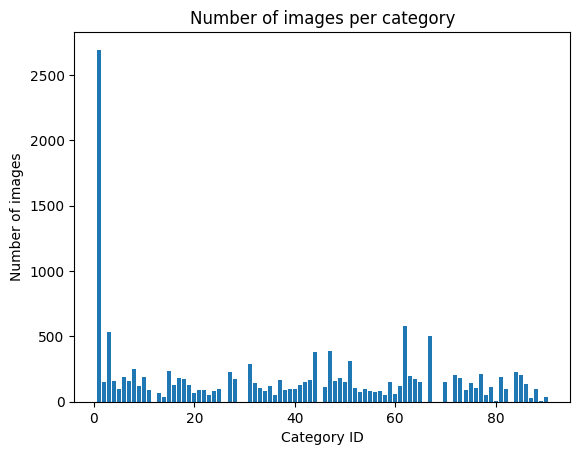

In [ ]:
# Load the categories
cats = coco.loadCats(coco.getCatIds())
id_cats = [cat['id'] for cat in cats]
cat_names = [cat['name'] for cat in cats]

image_count_per_cat = []
# Count the number of images per category
for id_cat in id_cats:
    imgids = coco.getImgIds(catIds=id_cat)
    image_count_per_cat.append(len(imgids))

# Legend for the plot
for i in range(len(id_cats)):
    print(f"Category {id_cats[i]}: {cat_names[i]} - Number of images: {image_count_per_cat[i]}")

plt.bar(id_cats, image_count_per_cat)
plt.title('Number of images per category')
plt.xlabel('Category ID')
plt.ylabel('Number of images')
plt.show()


### Number of images per Super Category

Super category 0: animal - Number of images: 1016
Super category 1: sports - Number of images: 938
Super category 2: food - Number of images: 708
Super category 3: outdoor - Number of images: 560
Super category 4: kitchen - Number of images: 909
Super category 5: furniture - Number of images: 1257
Super category 6: electronic - Number of images: 597
Super category 7: appliance - Number of images: 320
Super category 8: indoor - Number of images: 652
Super category 9: person - Number of images: 2693
Super category 10: accessory - Number of images: 726
Super category 11: vehicle - Number of images: 1160


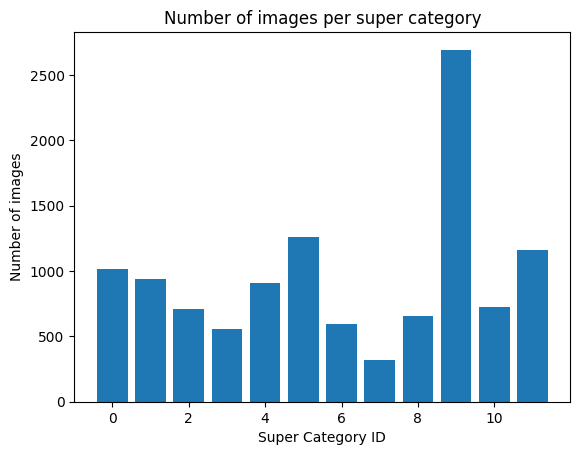

In [27]:
cats = coco.loadCats(coco.getCatIds())
id_cats = [cat['id'] for cat in cats]
super_cat_name = set([cat['supercategory'] for cat in cats])

# Create a dictionary with the supercategory name as key and the number of images as value
dict_super_cat = {super_name : 0 for super_name in super_cat_name}

# Dictionary that maps category id to supercategory name
dict_cat_super_cat = {}
for cat in cats:
    dict_cat_super_cat[cat['id']] = cat['supercategory']

# Dictionary to store the images that have been seen for each supercategory
image_seen = {super_category: [] for super_category in super_cat_name}

# Count the number of images for each supercategory
for id_cat in id_cats:
    imgids = coco.getImgIds(catIds=id_cat)
    for imgid in imgids:
        if imgid not in image_seen[dict_cat_super_cat[id_cat]]:
            dict_super_cat[dict_cat_super_cat[id_cat]] += 1
            image_seen[dict_cat_super_cat[id_cat]].append(imgid)

# Convert data in order to plot it
image_count_per_super_cat = list(dict_super_cat.values())
super_cat_name = {i: el for i, el in enumerate(super_cat_name)}

# Legend for the plot
for k, v in super_cat_name.items():
    print(f"Super category {k}: {v} - Number of images: {image_count_per_super_cat[k]}")

# Plot the data
plt.bar(super_cat_name.keys(), image_count_per_super_cat)
plt.title('Number of images per super category')
plt.xlabel('Super Category ID')
plt.ylabel('Number of images')
plt.show()
